# Computational Simulation of Equivalence Class Formation Using the go/no-go Procedure with Compound Stimuli

### Abstract
Research about equivalence has commonly utilized human participants as experimental subjects. More recently, computational models have been capable of reproducing performances observed in experiments with humans. The computational model often utilized is called RELNET, and it simulates training and testing trials of conditional relations using the matching-to-sample procedure (MTS). The differentiation between sample stimulus and comparison stimuli, indispensable in MTS, implies operational difficulties for simulations. For this reason, new studies seek to utilize alternative procedures to MTS, which do not differentiate the functions of the antecedent stimuli. This work evaluated the possibility of developing a new computational model to simulate equivalence class formation using the go/no-go procedure with compound stimuli. In Experiment 1, artificial neural networks were utilized to simulate training of the AB and BC relations as well as the testing of the AC relation. The results showed that four out of six runs demonstrated equivalence class formation. Experiment 2 evaluated whether the additional class training performed in Experiment 1, which was analogous to the simulation of pre-experimental experience of human participants, would be essential for simulating the establishment of equivalence classes. It was found that it was not possible to simulate equivalence class formation without the additional class training. Altogether, the experiments show that it is possible to simulate equivalence class formation using the go/no-go procedure with compound stimuli and that it is necessary to conduct additional class training. The model developed is, therefore, an alternative to RELNET for the study of equivalence relations using computational simulations.

[article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4960284/pdf/40732_2016_Article_184.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

%matplotlib inline
# plt.style.use('seaborn')
sns.set_palette("Greys")
plt.set_cmap("Greys")

<Figure size 432x288 with 0 Axes>

In [2]:
# plt.style.use('grayscale')

In [3]:
train_1_y=[1,1,1,1,0,1,0,1,0,1,0] 
test_1_y=[1,0,1,0]
train_2_y=[1,0,1,0,1,0,1,0]
test_2_y=[1,0,1,0]

In [4]:
def mean_sq_err(predict,real):
    return (np.mean((predict-real)**2))

In [5]:
dat=pd.read_csv("Results_1/TF_replicas.csv", 
                header=None, 
                names=(["exp_1_n_epocs",
                        "XY_1",
                        "YZ_1",
                        "XZ_1",
                        "A1B1_1",
                        "A1B2_1",
                        "B1C1_1",
                        "B1C2_1",
                        "A2B2_1",
                        "A2B1_1",
                        "B2C2_1",
                        "B2C1_1",
                        "A1C1_1",
                        "A1C2_1",
                        "A2C2_1",
                        "A2C1_1",
                        "exp_2_final_loss",
                        "exp_2_n_epocs",
                        "A1B1_2",
                        "A1B2_2",
                        "B1C1_2",
                        "B1C2_2",
                        "A2B2_2",
                        "A2B1_2",
                        "B2C2_2",
                        "B2C1_2",
                        "A1C1_2",
                        "A1C2_2",
                        "A2C2_2",
                        "A2C1_2",
                       ]))# , sep=";" # para bases en español #_hid_4_1
#dat=pd.read_csv("Results_1/test_hid_4_1.csv")# , sep=";" # para bases en español #_hid_4_1
print(len(dat))
print(list(dat.columns))

4573
['exp_1_n_epocs', 'XY_1', 'YZ_1', 'XZ_1', 'A1B1_1', 'A1B2_1', 'B1C1_1', 'B1C2_1', 'A2B2_1', 'A2B1_1', 'B2C2_1', 'B2C1_1', 'A1C1_1', 'A1C2_1', 'A2C2_1', 'A2C1_1', 'exp_2_final_loss', 'exp_2_n_epocs', 'A1B1_2', 'A1B2_2', 'B1C1_2', 'B1C2_2', 'A2B2_2', 'A2B1_2', 'B2C2_2', 'B2C1_2', 'A1C1_2', 'A1C2_2', 'A2C2_2', 'A2C1_2']


## Experiment 1

In [6]:
exp_1_b=dat.iloc[:,0:16]
exp_1_loss_b=np.mean((exp_1_b.iloc[:,1:12]-train_1_y)**2, axis=1)
exp_1=exp_1_b.loc[exp_1_loss_b<0.0025,:]
exp_1_final_loss=pd.DataFrame(np.mean((exp_1.iloc[:,1:12]-train_1_y)**2, axis=1), columns=["exp_1_final_loss"])
exp_1_test_loss=pd.DataFrame(np.mean((exp_1.iloc[:,12:16]-test_1_y)**2, axis=1), columns=["exp_1_test_loss"])
exp_1=pd.concat([exp_1,exp_1_final_loss,exp_1_test_loss], axis=1)

count     4567.000000
mean      5438.842566
std       1110.865679
min       3211.000000
25%       4792.000000
50%       5198.000000
75%       5793.000000
max      18911.000000
Name: exp_1_n_epocs, dtype: float64

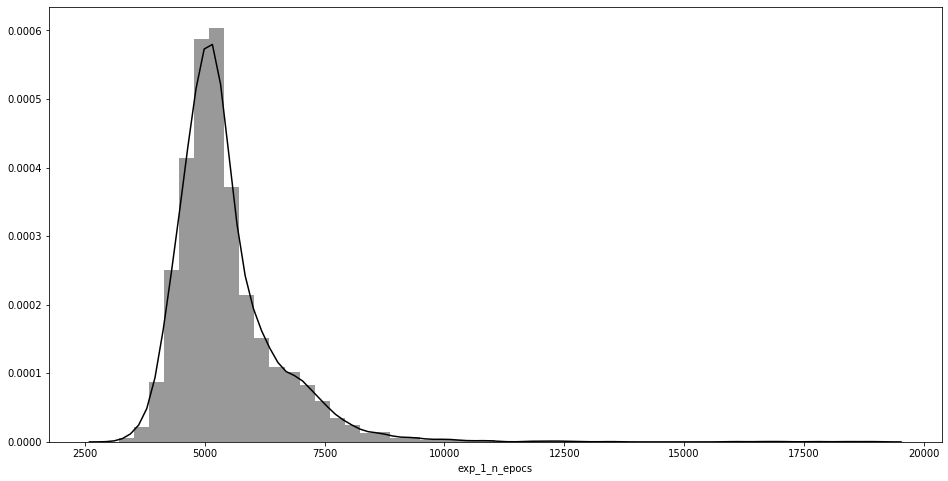

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(exp_1["exp_1_n_epocs"], color="k")
exp_1["exp_1_n_epocs"].describe()

count    4.567000e+03
mean     2.498864e-03
std      3.046728e-07
min      2.497587e-03
25%      2.498665e-03
50%      2.498893e-03
75%      2.499094e-03
max      2.499663e-03
Name: exp_1_final_loss, dtype: float64

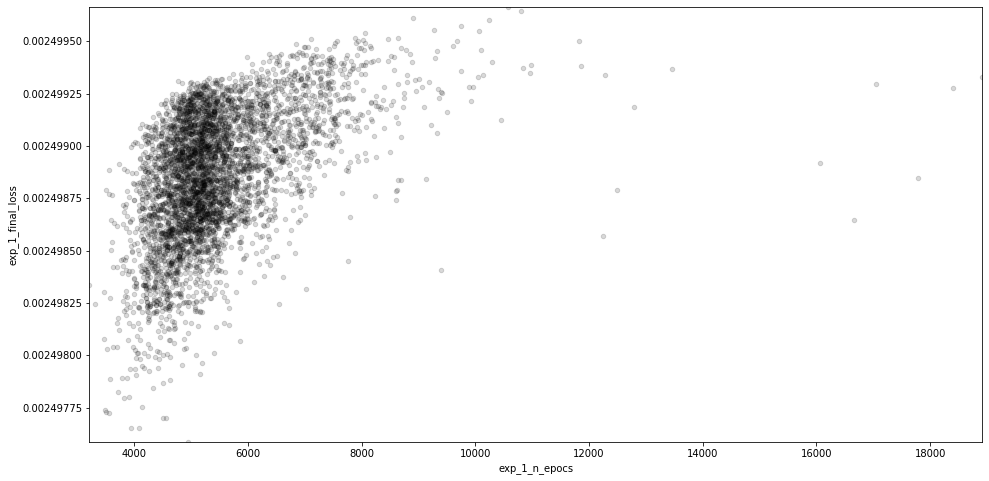

In [8]:
exp_1.plot.scatter(
    x='exp_1_n_epocs',
    y='exp_1_final_loss',
    ylim=(exp_1["exp_1_final_loss"].min(),exp_1["exp_1_final_loss"].max()),
    xlim=(exp_1["exp_1_n_epocs"].min(),exp_1["exp_1_n_epocs"].max()),
    figsize=(16,8),
    alpha=0.15,
    color="k"
)
exp_1["exp_1_final_loss"].describe()

In [9]:
exp_1.iloc[:,1:12].describe()

,XY_1,YZ_1,XZ_1,A1B1_1,A1B2_1,B1C1_1,B1C2_1,A2B2_1,A2B1_1,B2C2_1,B2C1_1
count,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000
mean,0.994421,0.994402,0.994430,0.942732,0.057011,0.942722,0.056281,0.942484,0.056781,0.942283,0.057024
std,0.005586,0.005570,0.005627,0.011784,0.012952,0.011443,0.012896,0.011559,0.013051,0.011368,0.013039
min,0.954656,0.959580,0.942786,0.889849,0.013542,0.890273,0.016614,0.899097,0.015976,0.890453,0.015399
25%,0.991959,0.991991,0.992060,0.935809,0.049722,0.935788,0.048738,0.935628,0.049327,0.935541,0.049430
50%,0.996263,0.996150,0.996268,0.941875,0.057259,0.941876,0.057305,0.941794,0.057185,0.941524,0.057343
75%,0.998566,0.998515,0.998559,0.948267,0.064805,0.948098,0.064352,0.947994,0.064842,0.947554,0.064968
max,0.999990,0.999983,0.999972,0.983347,0.101467,0.983363,0.107215,0.983703,0.103881,0.981766,0.107482


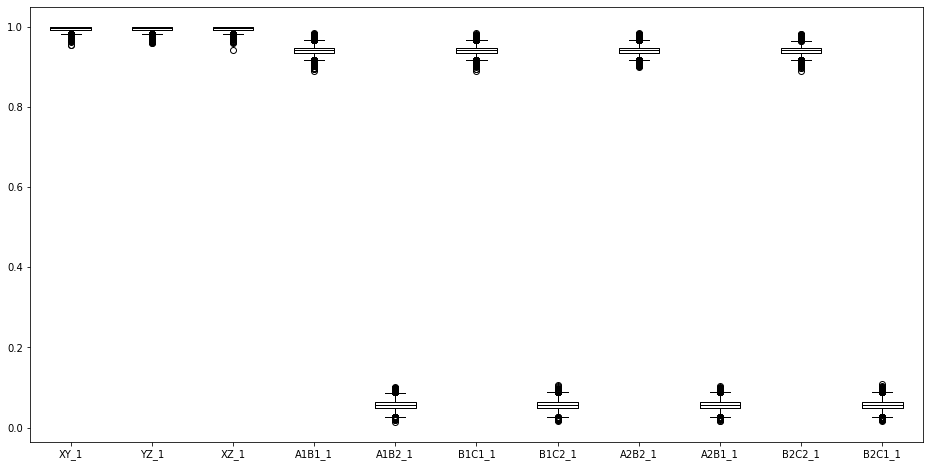

In [10]:
exp_1.iloc[:,1:12].plot(kind="box", figsize=(16,8), color="k")#, alpha=0.6)

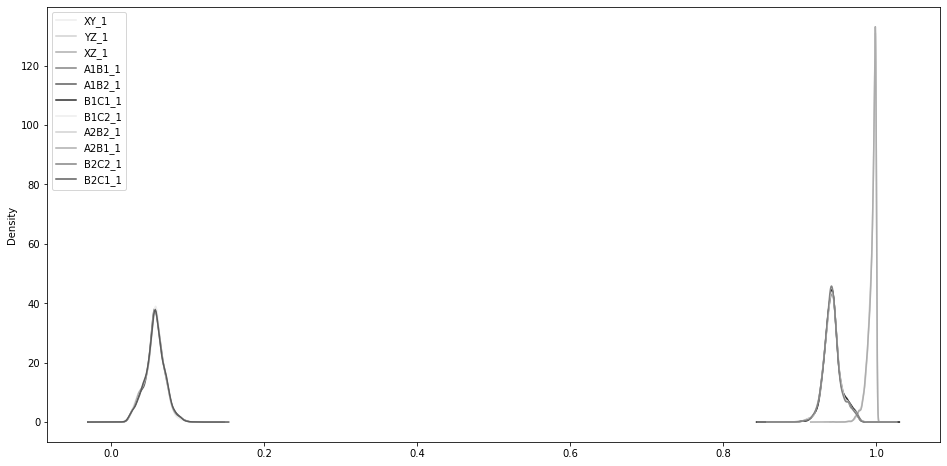

In [11]:
exp_1.iloc[:,1:12].plot(kind="density", figsize=(16,8))#, alpha=0.6)

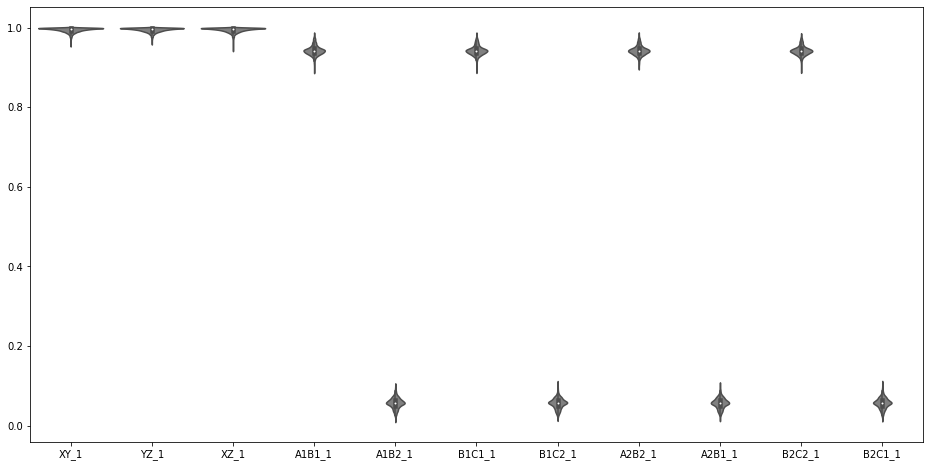

In [12]:
plt.figure(figsize=(16,8))
sns.violinplot(data=exp_1.iloc[:,1:12], color="grey")

In [13]:
exp_1.iloc[:,12:16].describe()

,A1C1_1,A1C2_1,A2C2_1,A2C1_1
count,4567.000000,4567.000000,4567.000000,4567.000000
mean,0.737970,0.350142,0.735196,0.355780
std,0.292651,0.294951,0.295396,0.296615
min,0.007612,0.013092,0.009058,0.009571
25%,0.592745,0.113021,0.590081,0.113342
50%,0.893162,0.220549,0.896446,0.229257
75%,0.948884,0.554243,0.948002,0.574510
max,0.998250,0.994799,0.998706,0.992644


In [14]:
n_acertadas=sum((exp_1.A1C1_1>=.85)&(exp_1.A1C2_1<=.15)&(exp_1.A2C2_1>=.85)&(exp_1.A2C1_1<=.15))
n_acertadas/exp_1.shape[0]

0.18611780162031968

In [15]:
outs_exp1=exp_1.iloc[:,12:16].copy()

In [16]:
outs_exp1=outs_exp1[["A1C1_1","A2C2_1","A1C2_1","A2C1_1"]]
outs_exp1.A1C1_1=1-outs_exp1.A1C1_1
outs_exp1.A2C2_1=1-outs_exp1.A2C2_1
outs_exp1

,A1C1_1,A2C2_1,A1C2_1,A2C1_1
0,0.040531,0.084141,0.248049,0.367685
1,0.023830,0.059748,0.136244,0.131652
2,0.200984,0.241065,0.297747,0.794905
3,0.629673,0.467388,0.907975,0.874114
4,0.040736,0.356770,0.154147,0.147639
...,...,...,...,...
4568,0.082187,0.097925,0.048010,0.048449
4569,0.163427,0.103545,0.037376,0.090959
4570,0.079266,0.042810,0.084928,0.052512
4571,0.678524,0.541027,0.704914,0.677103


In [17]:
(outs_exp1**2).describe()

,A1C1_1,A2C2_1,A1C2_1,A2C1_1
count,4567.000000,4567.000000,4567.000000,4567.000000
mean,0.154286,0.157361,0.209577,0.214540
std,0.265729,0.269888,0.289468,0.291146
min,0.000003,0.000002,0.000171,0.000092
25%,0.002613,0.002704,0.012774,0.012846
50%,0.011414,0.010723,0.048642,0.052559
75%,0.165857,0.168034,0.307186,0.330062
max,0.984834,0.981966,0.989625,0.985341


<Figure size 1152x648 with 0 Axes>

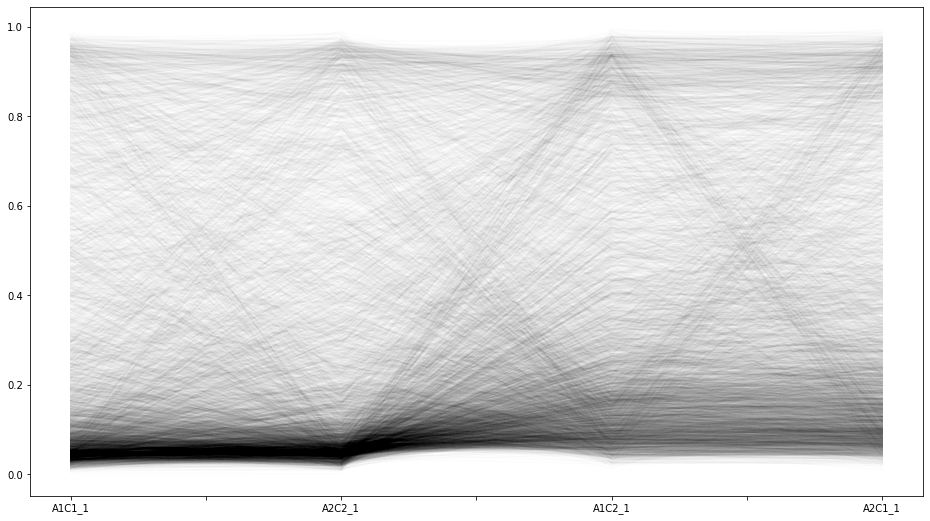

In [18]:
plt.figure(figsize=(16,9))
outs_exp1.T.plot(alpha=.01, color="k", legend=False, figsize=(16,9))
# plt.axhline(0.15, color="w")
# plt.axhline(0.15, color="k", linestyle="--")


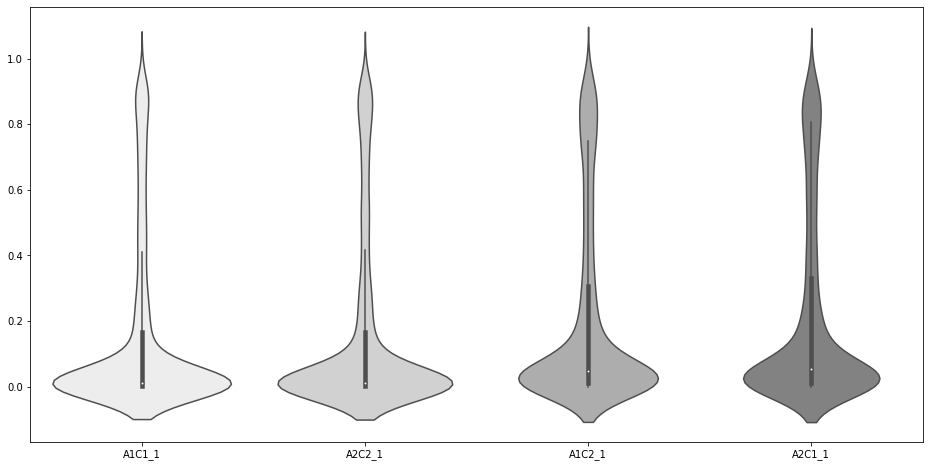

In [19]:
plt.figure(figsize=(16,8))
sns.violinplot(data=outs_exp1**2)

count    4567.000000
mean        0.183941
std         0.237919
min         0.003781
25%         0.015060
50%         0.061086
75%         0.277461
max         0.882405
Name: exp_1_test_loss, dtype: float64

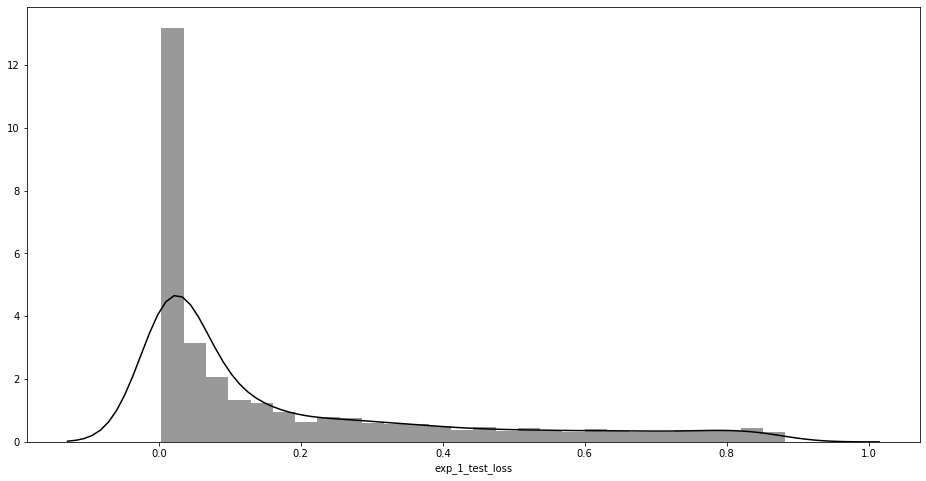

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(exp_1["exp_1_test_loss"], color="k")
exp_1["exp_1_test_loss"].describe()

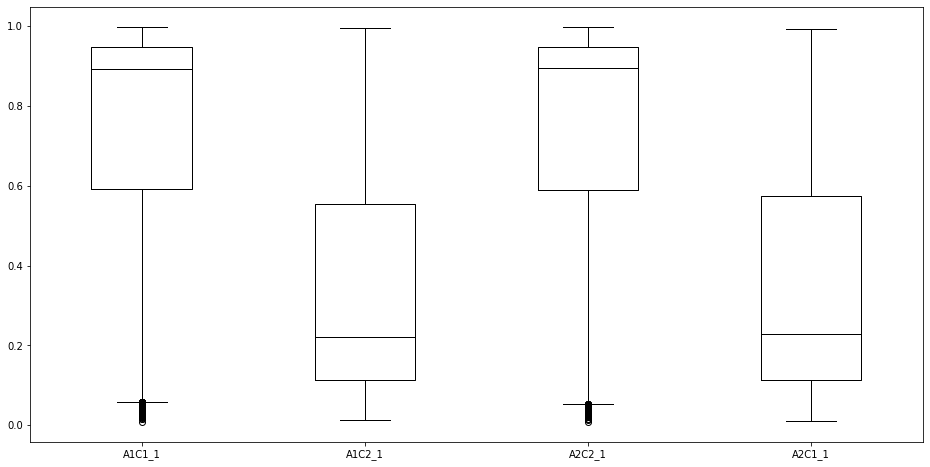

In [21]:
exp_1.iloc[:,12:16].plot(kind="box", figsize=(16,8), color="k")#, alpha=0.6)

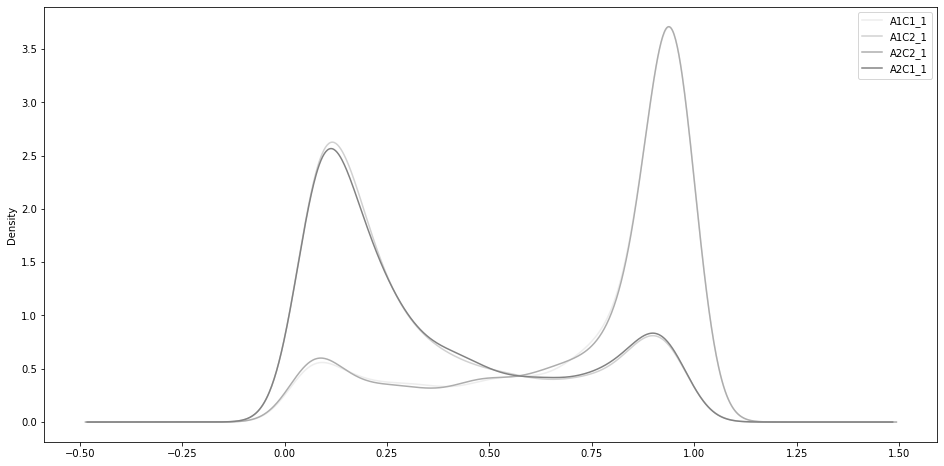

In [22]:
exp_1.iloc[:,12:16].plot.density(figsize=(16,8))

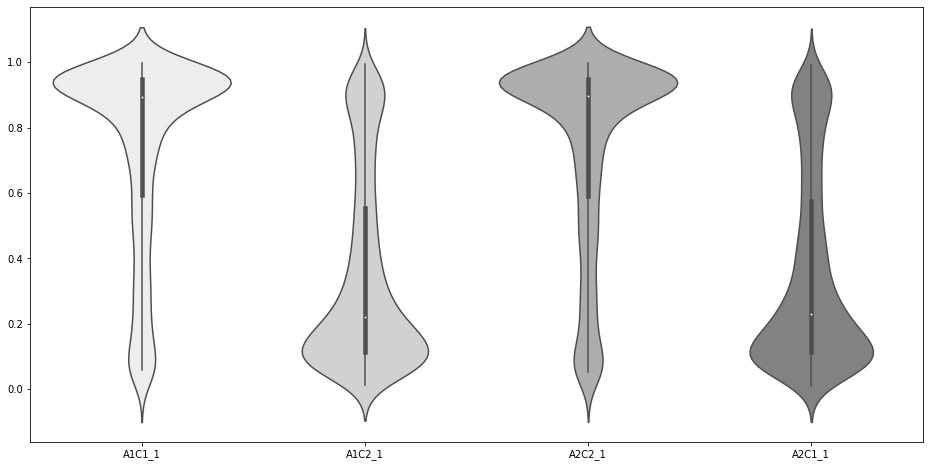

In [23]:
plt.figure(figsize=(16,8))
sns.violinplot(data=exp_1.iloc[:,12:16])

## Experiment 2

In [24]:
exp_2_b=dat.iloc[:,17:30]
exp_2_loss_b=np.mean((exp_2_b.iloc[:,1:9]-train_2_y)**2, axis=1)
exp_2=exp_2_b.loc[exp_2_loss_b<0.0025,:]
exp_2_final_loss=pd.DataFrame(np.mean((exp_2.iloc[:,1:9]-train_2_y)**2, axis=1), columns=["exp_2_final_loss"])
exp_2_test_loss=pd.DataFrame(np.mean((exp_2.iloc[:,9:13]-test_2_y)**2, axis=1), columns=["exp_2_test_loss"])
exp_2=pd.concat([exp_2,exp_2_final_loss,exp_2_test_loss], axis=1)

count     4570.000000
mean      5306.418381
std       1126.483639
min       3120.000000
25%       4609.000000
50%       5046.500000
75%       5767.000000
max      16874.000000
Name: exp_2_n_epocs, dtype: float64

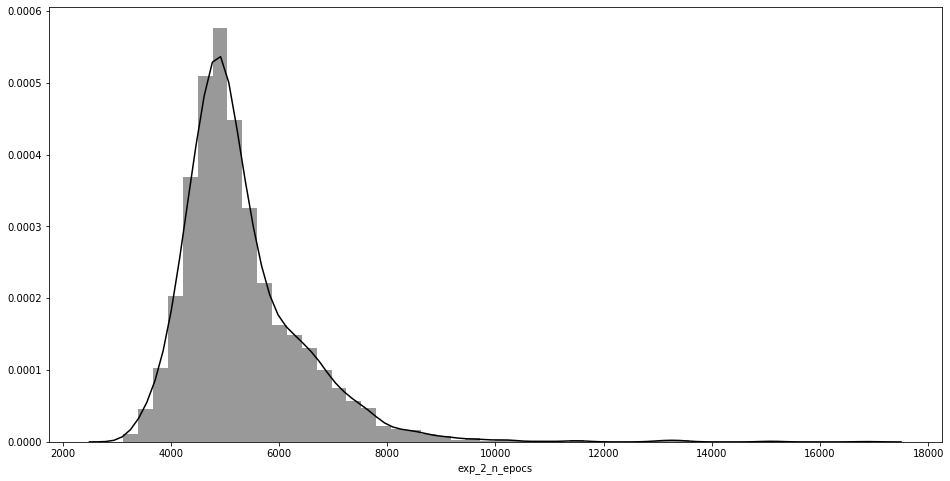

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(exp_2["exp_2_n_epocs"], color="k")
exp_2["exp_2_n_epocs"].describe()

count    4.570000e+03
mean     2.498844e-03
std      3.229984e-07
min      2.497460e-03
25%      2.498642e-03
50%      2.498873e-03
75%      2.499085e-03
max      2.499676e-03
Name: exp_2_final_loss, dtype: float64

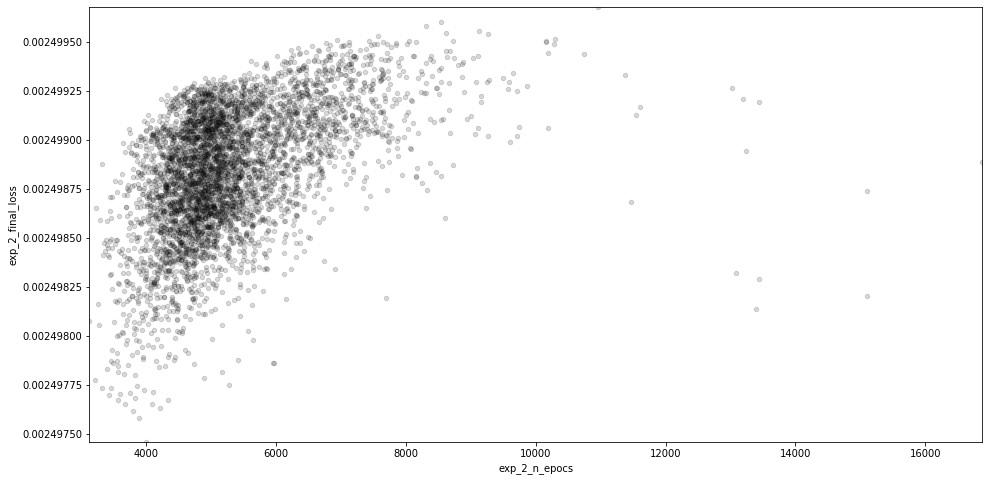

In [26]:
exp_2.plot.scatter(
    x='exp_2_n_epocs',
    y='exp_2_final_loss',
    ylim=(exp_2["exp_2_final_loss"].min(),exp_2["exp_2_final_loss"].max()),
    xlim=(exp_2["exp_2_n_epocs"].min(),exp_2["exp_2_n_epocs"].max()),
    figsize=(16,8),
    alpha=0.15,
    color="k"
)
exp_2["exp_2_final_loss"].describe()

In [27]:
exp_2.iloc[:,1:9].describe()

,A1B1_2,A1B2_2,B1C1_2,B1C2_2,A2B2_2,A2B1_2,B2C2_2,B2C1_2
count,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000
mean,0.951579,0.048771,0.951405,0.048790,0.951029,0.048552,0.951214,0.048652
std,0.011425,0.011503,0.011334,0.011254,0.011171,0.011189,0.011047,0.011540
min,0.913267,0.002455,0.910443,0.008668,0.909249,0.009872,0.911983,0.005294
25%,0.944517,0.042866,0.944534,0.042847,0.944112,0.042855,0.944399,0.042548
50%,0.950501,0.049546,0.950534,0.049541,0.950241,0.049528,0.950284,0.049557
75%,0.957526,0.055556,0.957377,0.055701,0.956740,0.055600,0.956820,0.055701
max,0.993607,0.088846,0.988741,0.093870,0.988988,0.090656,0.986145,0.087841


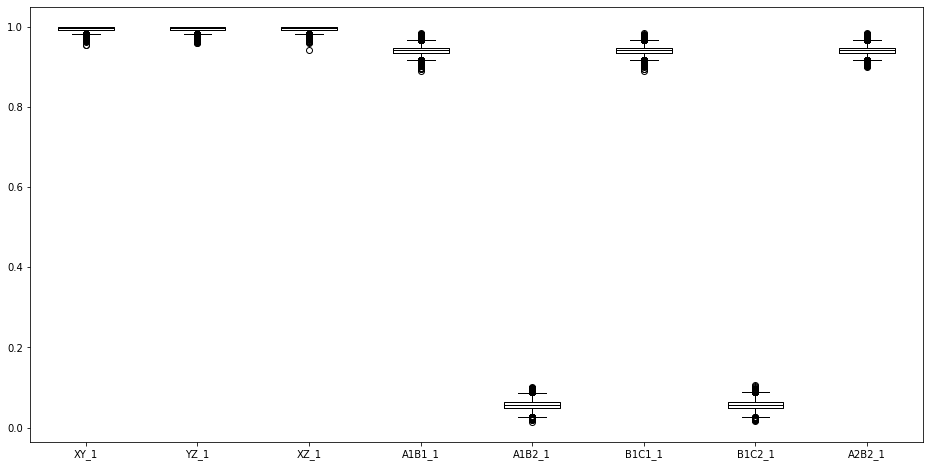

In [28]:
exp_1.iloc[:,1:9].plot(kind="box", figsize=(16,8),color="k")#, alpha=0.6)

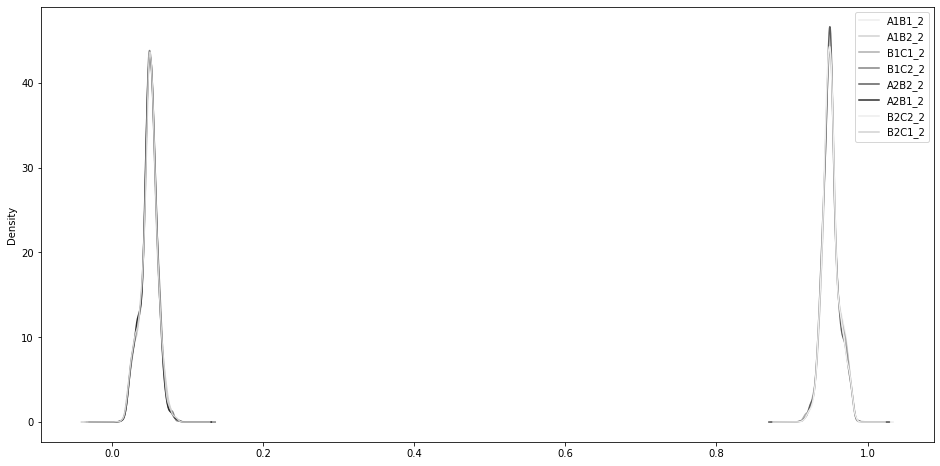

In [29]:
exp_2.iloc[:,1:9].plot(kind="density", figsize=(16,8))#, alpha=0.6)

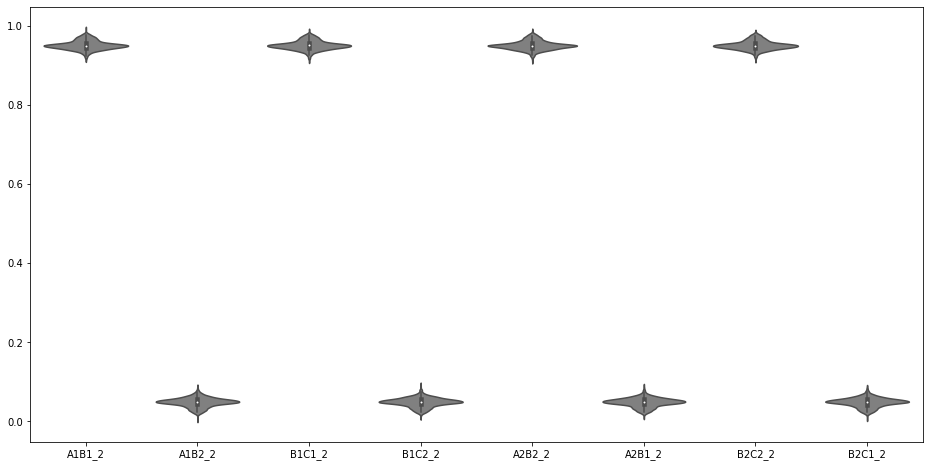

In [30]:
plt.figure(figsize=(16,8))
sns.violinplot(data=exp_2.iloc[:,1:9], color="grey")

In [31]:
exp_2.iloc[:,9:13].describe()

,A1C1_2,A1C2_2,A2C2_2,A2C1_2
count,4570.000000,4570.000000,4570.000000,4570.000000
mean,0.506043,0.496124,0.506886,0.490824
std,0.366474,0.349942,0.369897,0.352279
min,0.003938,0.009258,0.004307,0.012295
25%,0.105993,0.131003,0.101619,0.124552
50%,0.505768,0.493621,0.523885,0.475981
75%,0.902990,0.870384,0.905411,0.867198
max,0.992828,0.995672,0.995073,0.993315


count    4570.000000
mean        0.372944
std         0.323854
min         0.002749
25%         0.036188
50%         0.304086
75%         0.697753
max         0.896722
Name: exp_2_test_loss, dtype: float64

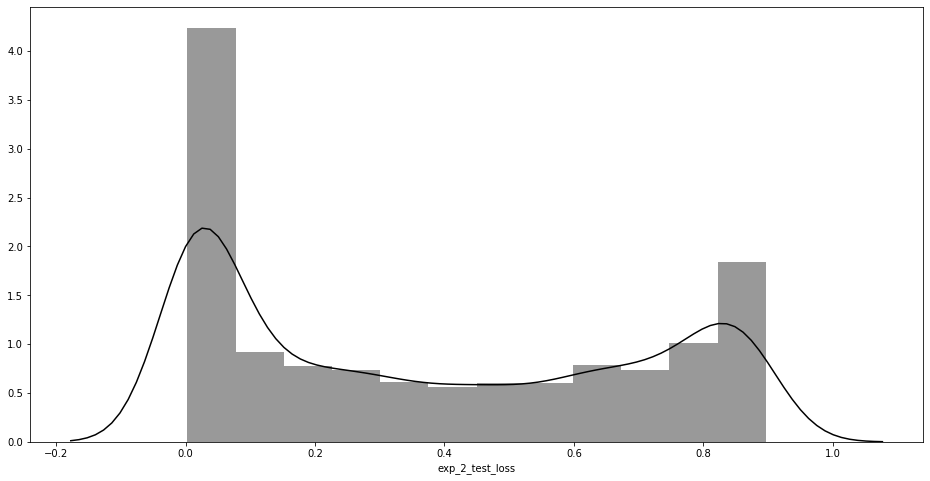

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(exp_2["exp_2_test_loss"], color="k")
exp_2["exp_2_test_loss"].describe()

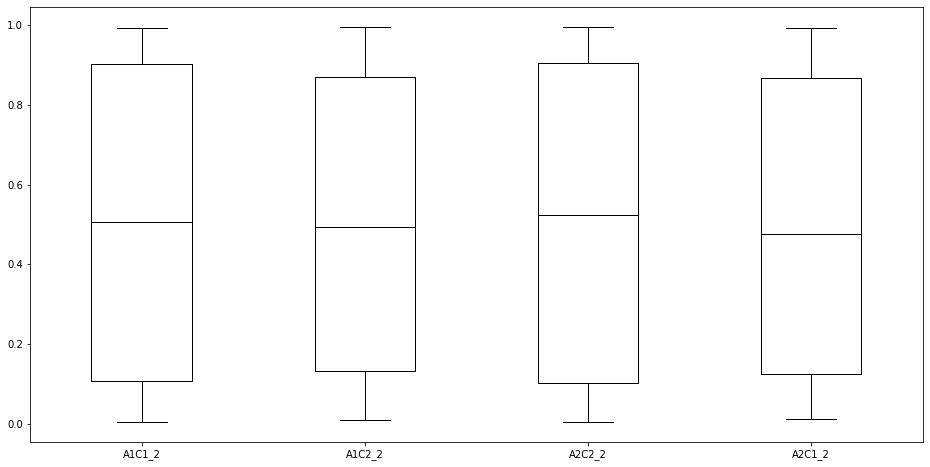

In [33]:
exp_2.iloc[:,9:13].plot(kind="box", figsize=(16,8), color="k")#, alpha=0.6)

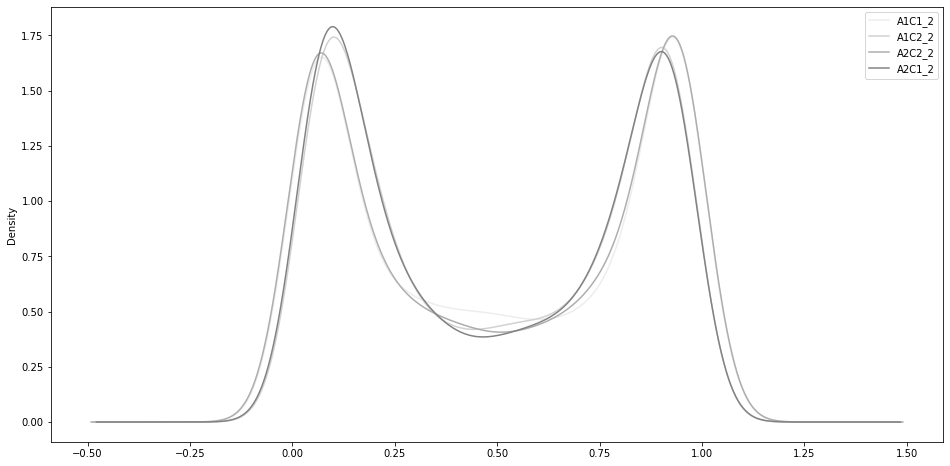

In [34]:
exp_2.iloc[:,9:13].plot.density(figsize=(16,8))

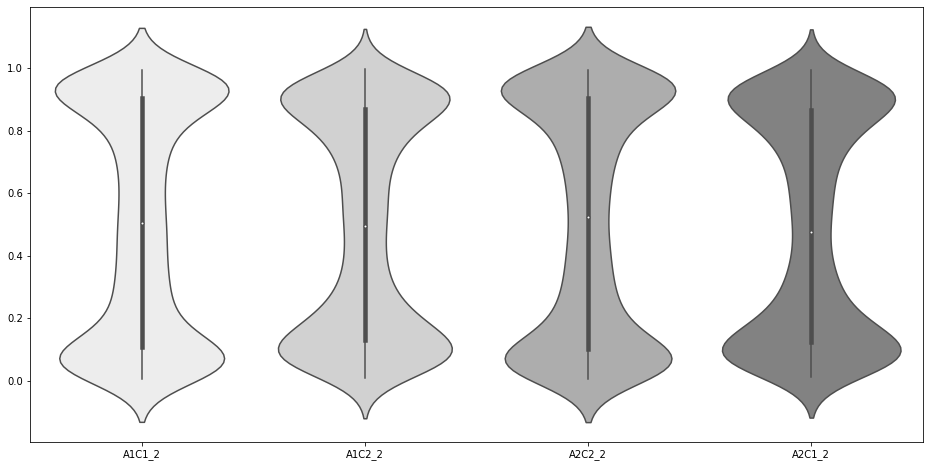

In [35]:
plt.figure(figsize=(16,8))
sns.violinplot(data=exp_2.iloc[:,9:13])

In [36]:
n_acertadas_2=sum((exp_2.A1C1_2>=.85)&(exp_2.A1C2_2<=.15)&(exp_2.A2C2_2>=.85)&(exp_2.A2C1_2<=.15))
print(n_acertadas_2, exp_2.shape[0], n_acertadas_2/exp_2.shape[0])

1-((n_acertadas_2/exp_2.shape[0])/(n_acertadas/exp_1.shape[0]))#0.18611780162031968

583 4570 0.1275711159737418


0.31456789805637786

In [37]:
outs_exp2=exp_2.iloc[:,9:13].copy()
outs_exp2

,A1C1_2,A1C2_2,A2C2_2,A2C1_2
0,0.033306,0.723366,0.030288,0.743607
1,0.931179,0.087350,0.967186,0.080081
2,0.558607,0.867687,0.848050,0.083811
3,0.316136,0.203595,0.957085,0.143344
4,0.073417,0.943583,0.058566,0.935872
...,...,...,...,...
4568,0.888158,0.054024,0.954889,0.049067
4569,0.646422,0.808499,0.593005,0.758083
4570,0.957603,0.109816,0.833169,0.129505
4571,0.902544,0.054482,0.517080,0.051264


In [38]:
outs_exp2=outs_exp2[["A1C1_2","A2C2_2","A1C2_2","A2C1_2"]]
outs_exp2.A1C1_2=1-outs_exp2.A1C1_2
outs_exp2.A2C2_2=1-outs_exp2.A2C2_2
outs_exp2

,A1C1_2,A2C2_2,A1C2_2,A2C1_2
0,0.966694,0.969712,0.723366,0.743607
1,0.068821,0.032814,0.087350,0.080081
2,0.441393,0.151950,0.867687,0.083811
3,0.683864,0.042915,0.203595,0.143344
4,0.926583,0.941434,0.943583,0.935872
...,...,...,...,...
4568,0.111842,0.045111,0.054024,0.049067
4569,0.353578,0.406995,0.808499,0.758083
4570,0.042397,0.166831,0.109816,0.129505
4571,0.097456,0.482920,0.054482,0.051264


In [39]:
(outs_exp2**2).describe()

,A1C1_2,A2C2_2,A1C2_2,A2C1_2
count,4570.000000,4570.000000,4570.000000,4570.000000
mean,0.378268,0.379955,0.368572,0.364981
std,0.372745,0.376875,0.356569,0.357371
min,0.000051,0.000024,0.000086,0.000151
25%,0.009411,0.008947,0.017162,0.015513
50%,0.244265,0.226686,0.243661,0.226558
75%,0.799249,0.807088,0.757568,0.752033
max,0.992139,0.991404,0.991364,0.986674


<Figure size 1152x648 with 0 Axes>

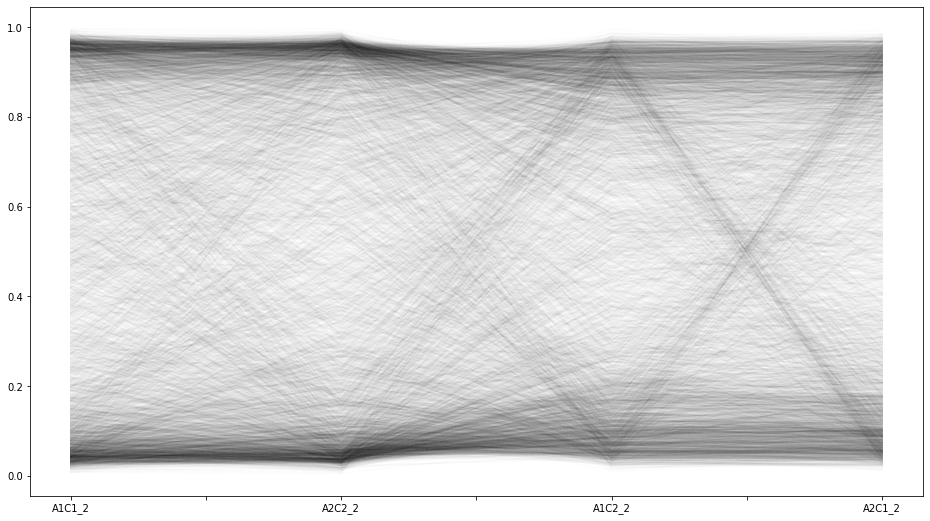

In [40]:
plt.figure(figsize=(16,9))
outs_exp2.T.plot(alpha=.01, color="k", legend=False, figsize=(16,9))
# plt.axhline(0.15, color="w")
# plt.axhline(0.15, color="k", linestyle="--")


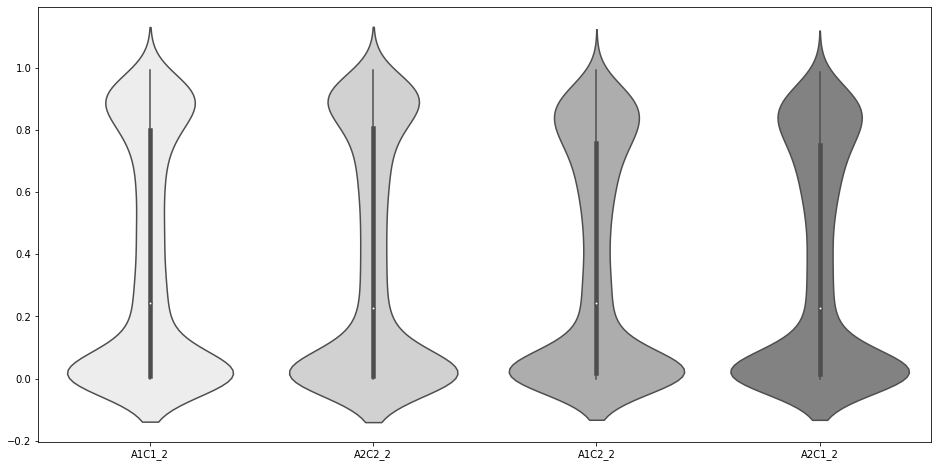

In [41]:
plt.figure(figsize=(16,8))
sns.violinplot(data=outs_exp2**2)


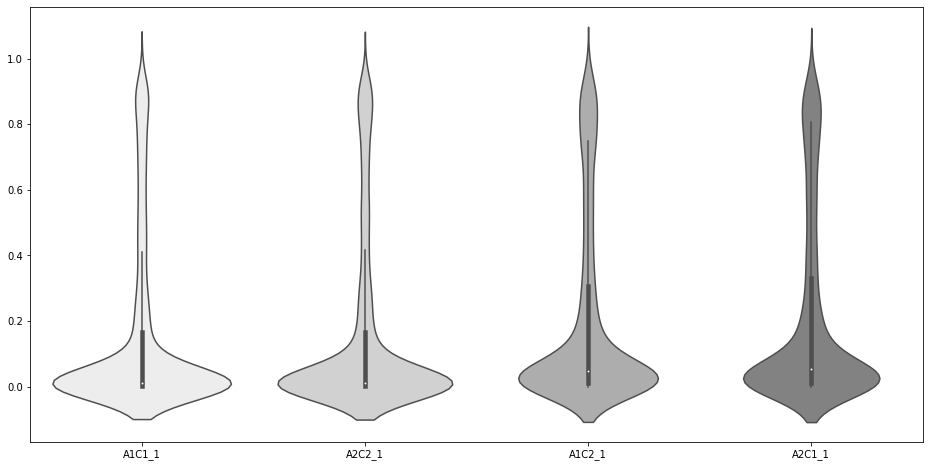

In [42]:
plt.figure(figsize=(16,8))
sns.violinplot(data=outs_exp1**2)

In [43]:
sqerror_outs=pd.concat([outs_exp1**2,outs_exp2**2], axis=1)
sqerror_outs=sqerror_outs[["A1C1_1","A1C1_2","A1C2_1","A1C2_2","A2C1_1","A2C1_2","A2C2_1","A2C2_2"]]

<Figure size 1152x576 with 0 Axes>

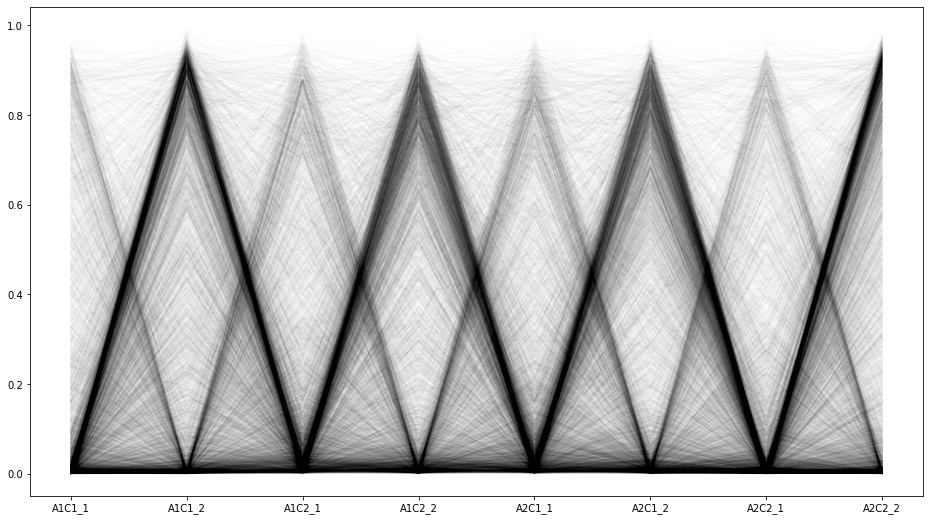

In [44]:
plt.figure(figsize=(16,8))
sqerror_outs.T.plot(alpha=.01, color="k", legend=False, figsize=(16,9))
# sns.boxplot(data=sqerror_outs)
# plt.yscale('log')


In [45]:
error_outs=pd.concat([outs_exp1,outs_exp2], axis=1)
error_outs=error_outs[["A1C1_1","A2C2_1","A1C2_1","A2C1_1","A1C1_2","A2C2_2","A1C2_2","A2C1_2"]]

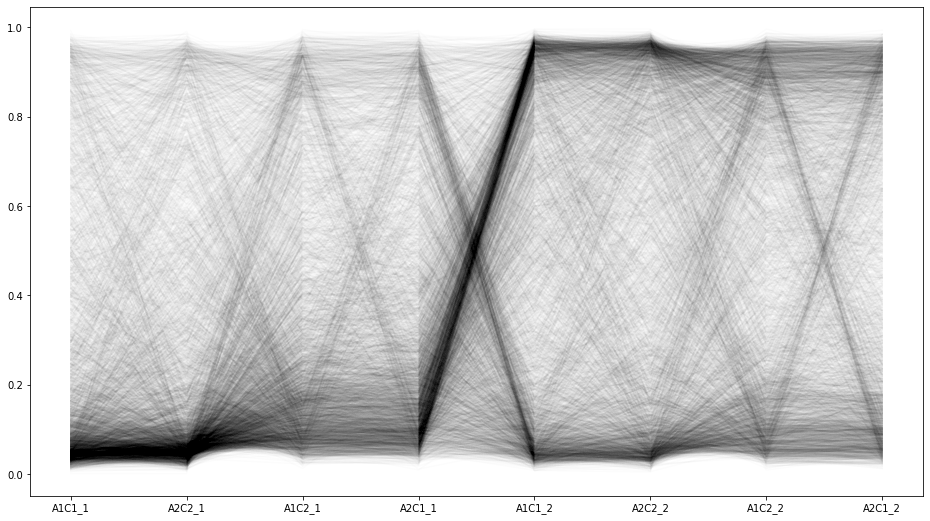

In [46]:
error_outs.T.plot(alpha=.01, color="k", legend=False, figsize=(16,9))